In [91]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [7]:
from sklearn.datasets import load_boston
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Оценим наличие пропусков в датасете

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Так как мы строим линейную регрессию, оценим корреляцию между всеми признаками и целевым значением. Чем ближе модуль этой величины к 1, тем более корреляция. 

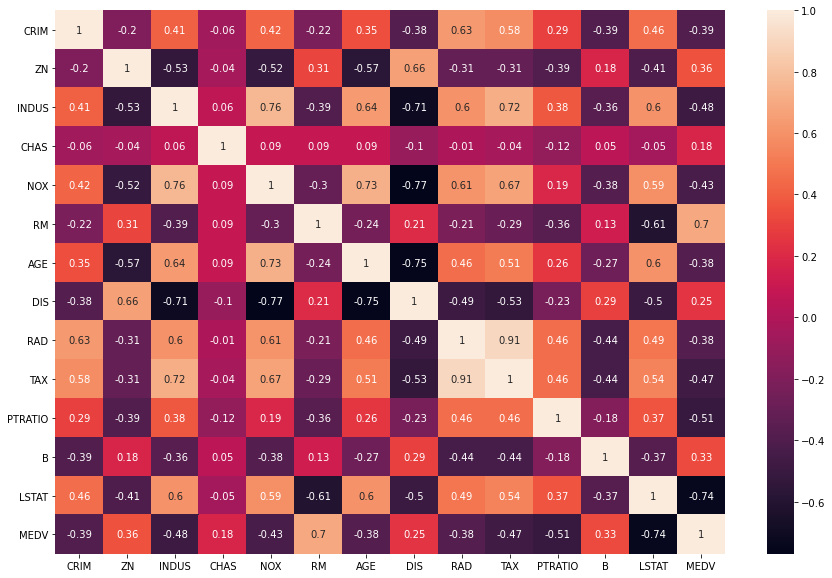

In [77]:
corr_matrix = data.corr().round(2)
plt.figure(figsize=(15,10))
sns.heatmap(data=corr_matrix, annot=True)

По тепловой карте видно, что некоторые признаки имеют сильную корреляцию между собой. Тогда из пары таких признаков отбираем для использования в модели только один.
Например пара RAD-TAX имеет коэффициент корреляции равный 0,91. DIS - NOX -0,77, DIS - AGE -0,75, DIS - INDUS -0,71.  
CHAS имеет коэффициент корреляции к целевой переменной 0,18, поэтому мы не будем использовать его в модели

In [86]:
X = data[[ 'CRIM', 'ZN', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']

Делим выборку на тестовую и обучающую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Строим линейную модель и оцениваем ее среднюю абсолютную ошибку

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

Weights: [-0.07232946  0.04995604  3.27800388 -0.87996271  0.04103293 -0.85669837
  0.0089361  -0.63441198]
Bias: 25.353212092465302


In [88]:
print('Error: {}'.format(mean_absolute_error(predictions, y_test)))

Error: 3.427663288312257


In [89]:
model.score(X_test, y_test)

0.766166064946026